<a href="https://colab.research.google.com/github/Aastik01us/Blockchain/blob/main/notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ===============================
# 1. Install & Import Libraries
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

# Folder Structure Creation
base_dir = "ds_AastikSonkar"
os.makedirs(f"{base_dir}/csv_files", exist_ok=True)
os.makedirs(f"{base_dir}/outputs", exist_ok=True)

# ===============================
# 2. Load Data
# ===============================
fear_greed = pd.read_csv("fear_greed_index.csv")
trader_data = pd.read_csv("historical_data.csv")

# ===============================
# 3. Clean & Format Dates
# ===============================
# Convert date in Fear/Greed dataset
fear_greed["date"] = pd.to_datetime(fear_greed["date"]).dt.date

# Convert trader Timestamp IST to date
trader_data["Timestamp IST"] = pd.to_datetime(trader_data["Timestamp IST"], format="%d-%m-%Y %H:%M")
trader_data["date"] = trader_data["Timestamp IST"].dt.date

# ===============================
# 4. Merge Datasets
# ===============================
merged_df = pd.merge(trader_data, fear_greed[["date", "classification", "value"]],
                     on="date", how="left")

# Save merged CSV
merged_df.to_csv(f"{base_dir}/csv_files/merged_data.csv", index=False)

# ===============================
# 5. EDA & Visualization
# ===============================
plt.figure(figsize=(8,5))
sns.barplot(data=merged_df, x="classification", y="Closed PnL", estimator=np.mean)
plt.title("Average Closed PnL by Market Sentiment")
plt.savefig(f"{base_dir}/outputs/avg_pnl_by_sentiment.png")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=merged_df, x="classification", y="Closed PnL")
plt.title("PnL Distribution by Market Sentiment")
plt.savefig(f"{base_dir}/outputs/pnl_distribution.png")
plt.show()

plt.figure(figsize=(8,5))
sns.heatmap(
    merged_df.pivot_table(values="Closed PnL", index="classification", columns="Side", aggfunc=np.mean),
    annot=True, fmt=".2f", cmap="coolwarm"
)
plt.title("PnL Heatmap: Sentiment vs Side")
plt.savefig(f"{base_dir}/outputs/pnl_heatmap.png")
plt.show()

daily_profit = merged_df.groupby("date")["Closed PnL"].sum().reset_index()
plt.figure(figsize=(10,5))
plt.plot(daily_profit["date"], daily_profit["Closed PnL"], label="Daily Profit")
plt.title("Daily Profit Over Time")
plt.xticks(rotation=45)
plt.savefig(f"{base_dir}/outputs/daily_profit.png")
plt.show()

# ===============================
# 6. Insights
# ===============================
insights = []
for sentiment in merged_df["classification"].unique():
    avg_pnl = merged_df.loc[merged_df["classification"] == sentiment, "Closed PnL"].mean()
    avg_size = merged_df.loc[merged_df["classification"] == sentiment, "Size USD"].mean()
    win_rate = (merged_df.loc[merged_df["classification"] == sentiment, "Closed PnL"] > 0).mean() * 100
    insights.append({
        "Sentiment": sentiment,
        "Avg Closed PnL": avg_pnl,
        "Avg Size USD": avg_size,
        "Win Rate (%)": win_rate
    })

insights_df = pd.DataFrame(insights)
insights_df.to_csv(f"{base_dir}/csv_files/sentiment_insights.csv", index=False)
print(insights_df)

# ===============================
# 7. README creation
# ===============================
readme_content = """
# Trader Behavior vs Market Sentiment Analysis

## Project Overview
This analysis explores the relationship between trader performance and Bitcoin market sentiment (Fear/Greed Index).

## Folder Structure
- notebook_1.ipynb: Main analysis notebook.
- csv_files/: Contains raw and processed CSV files.
- outputs/: Contains graphs and visualizations.
- ds_report.pdf: Summary of findings.
- README.md: This file.

## How to Run
1. Open notebook_1.ipynb in Google Colab.
2. Run all cells.
3. Outputs will be saved in the outputs/ folder.
"""

with open(f"{base_dir}/README.md", "w") as f:
    f.write(readme_content)


ValueError: time data "21-04-2025 17:" doesn't match format "%d-%m-%Y %H:%M", at position 472. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

In [3]:
base_dir = "ds_AastikSonkar"
os.makedirs(f"{base_dir}/csv_files", exist_ok=True)
os.makedirs(f"{base_dir}/outputs", exist_ok=True)

In [4]:
fear_greed = pd.read_csv("fear_greed_index.csv")
trader_data = pd.read_csv("historical_data.csv")

In [5]:
fear_greed["date"] = pd.to_datetime(fear_greed["date"]).dt.date

In [6]:
trader_data["Timestamp IST"] = pd.to_datetime(trader_data["Timestamp IST"], format="%d-%m-%Y %H:%M")
trader_data["date"] = trader_data["Timestamp IST"].dt.date

In [7]:
merged_df = pd.merge(trader_data, fear_greed[["date", "classification", "value"]],
                     on="date", how="left")

In [8]:
merged_df.to_csv(f"{base_dir}/csv_files/merged_data.csv", index=False)

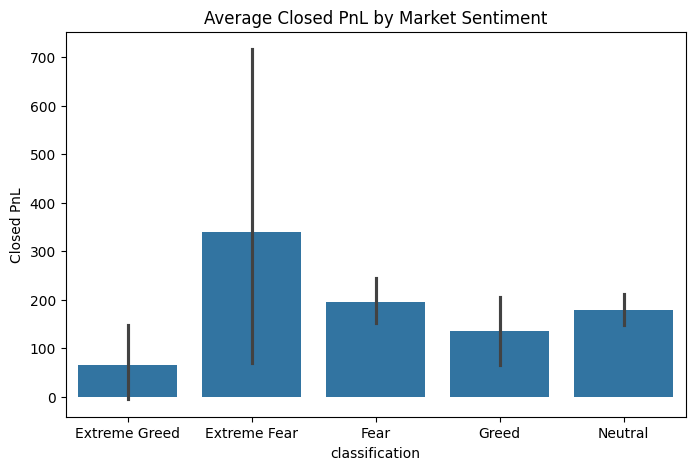

In [9]:
plt.figure(figsize=(8,5))
sns.barplot(data=merged_df, x="classification", y="Closed PnL", estimator=np.mean)
plt.title("Average Closed PnL by Market Sentiment")
plt.savefig(f"{base_dir}/outputs/avg_pnl_by_sentiment.png")
plt.show()

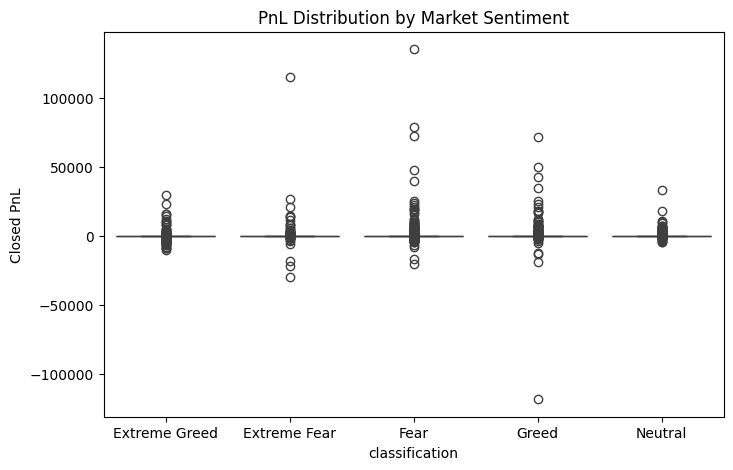

In [10]:
plt.figure(figsize=(8,5))
sns.boxplot(data=merged_df, x="classification", y="Closed PnL")
plt.title("PnL Distribution by Market Sentiment")
plt.savefig(f"{base_dir}/outputs/pnl_distribution.png")
plt.show()

/tmp/ipython-input-70774189.py:3: FutureWarning: The provided callable <function mean at 0x79815091a700> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  merged_df.pivot_table(values="Closed PnL", index="classification", columns="Side", aggfunc=np.mean),


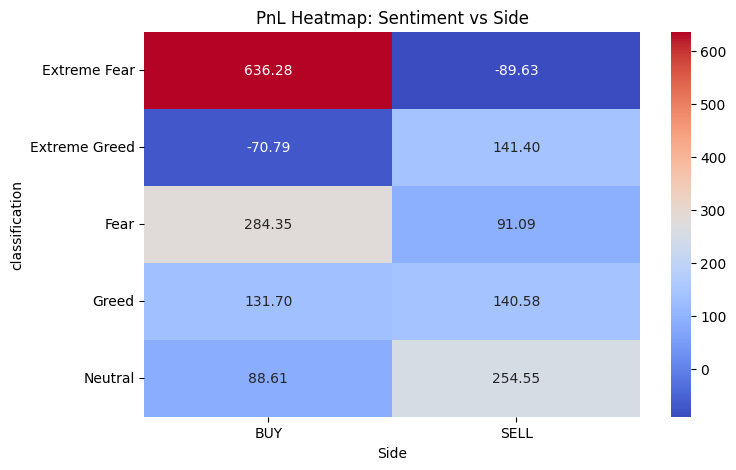

In [11]:
plt.figure(figsize=(8,5))
sns.heatmap(
    merged_df.pivot_table(values="Closed PnL", index="classification", columns="Side", aggfunc=np.mean),
    annot=True, fmt=".2f", cmap="coolwarm"
)
plt.title("PnL Heatmap: Sentiment vs Side")
plt.savefig(f"{base_dir}/outputs/pnl_heatmap.png")
plt.show()

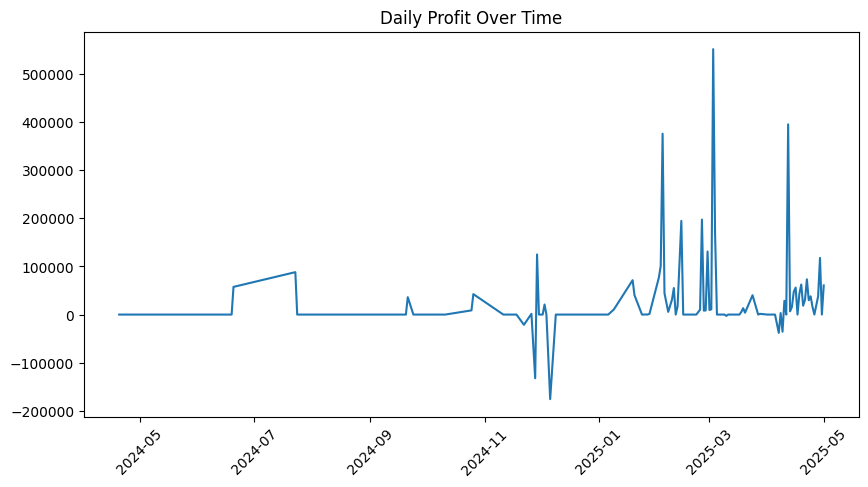

In [12]:
daily_profit = merged_df.groupby("date")["Closed PnL"].sum().reset_index()
plt.figure(figsize=(10,5))
plt.plot(daily_profit["date"], daily_profit["Closed PnL"], label="Daily Profit")
plt.title("Daily Profit Over Time")
plt.xticks(rotation=45)
plt.savefig(f"{base_dir}/outputs/daily_profit.png")
plt.show()


In [13]:
insights = []
for sentiment in merged_df["classification"].unique():
    avg_pnl = merged_df.loc[merged_df["classification"] == sentiment, "Closed PnL"].mean()
    avg_size = merged_df.loc[merged_df["classification"] == sentiment, "Size USD"].mean()
    win_rate = (merged_df.loc[merged_df["classification"] == sentiment, "Closed PnL"] > 0).mean() * 100
    insights.append({
        "Sentiment": sentiment,
        "Avg Closed PnL": avg_pnl,
        "Avg Size USD": avg_size,
        "Win Rate (%)": win_rate
    })

insights_df = pd.DataFrame(insights)
insights_df.to_csv(f"{base_dir}/csv_files/sentiment_insights.csv", index=False)
print(insights_df)


       Sentiment  Avg Closed PnL  Avg Size USD  Win Rate (%)
0  Extreme Greed       65.938570   8437.322281     11.500000
1   Extreme Fear      338.916162   7681.766118     32.262383
2           Fear      194.770442  30507.735890     41.561683
3          Greed      136.216495  28036.998658     35.038039
4        Neutral      178.839679  25814.644156     54.261821
5            NaN             NaN           NaN           NaN


In [14]:
readme_content = """
# Trader Behavior vs Market Sentiment Analysis

## Project Overview
This analysis explores the relationship between trader performance and Bitcoin market sentiment (Fear/Greed Index).

## Folder Structure
- notebook_1.ipynb: Main analysis notebook.
- csv_files/: Contains raw and processed CSV files.
- outputs/: Contains graphs and visualizations.
- ds_report.pdf: Summary of findings.
- README.md: This file.

## How to Run
1. Open notebook_1.ipynb in Google Colab.
2. Run all cells.
3. Outputs will be saved in the outputs/ folder.
"""

with open(f"{base_dir}/README.md", "w") as f:
    f.write(readme_content)
